In [101]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from top2vec import Top2Vec
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from math import ceil
from tqdm.notebook import tqdm
tqdm.pandas()

import sys 
sys.path.append('/Users/namph/Documents/know-life')
from src.utils.normalizer import text_normalize
from src.utils.tokenizer import words_seg


## Process data

In [127]:
df = pd.read_csv('/Users/namph/Documents/know-life/data/eda/question_alobacsi.csv')
df.shape

(58926, 4)

In [128]:
df = df.dropna(subset=["titles"]).drop_duplicates()
df.shape

(58920, 4)

##### Titles

In [129]:
df["titles"] = df["titles"].progress_apply(text_normalize)
df["titles"] = df["titles"].progress_apply(lambda x: " ".join(words_seg(x)))

  0%|          | 0/58920 [00:00<?, ?it/s]

  0%|          | 0/58920 [00:00<?, ?it/s]

In [130]:
df.drop(columns="questions", inplace=True)

In [132]:
df.to_csv("/Users/namph/Documents/know-life/data/eda/title_word.csv", index=False)

##### Questions

In [5]:
questions = df["questions"].dropna().progress_apply(text_normalize)
questions = questions.progress_apply(lambda x: " ".join(words_seg(x)))

  0%|          | 0/91801 [00:00<?, ?it/s]

  0%|          | 0/91801 [00:00<?, ?it/s]

In [7]:
questions.to_csv("/Users/namph/Documents/know-life/data/eda/question_word.csv", index=False)

## EDA

In [27]:
with open('/Users/namph/Documents/know-life/data/eda/stopwords.txt') as f:
    stopwords_ = f.readlines()

In [28]:
stopwords = set(map(lambda x: x.strip(), stopwords_))|set(['alobacsi', 'edoctor', 'vinmec', 'isofhcare', 'skds'])

In [29]:
print(sorted(stopwords)[:10])

['_sạch', 'a-lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alobacsi', 'alô', 'amen']


In [30]:
def remove_stop_words(X):
    features = []
    for x in X.split():
        if x.lower() not in stopwords and len(x) > 2:
            features.append(x.lower())
    return ' '.join(features)

def tokenizer(doc):
    return doc.split()

def check_valid(text):
    count = 0
    for t in text.split():
        if not re.match("^[a-zA-Z0-9đĐ_]", t):
            count += 1
    return False if count >= len(text.split())//2 else True

#### EDA title

##### Top2vec

In [21]:
titles = pd.read_csv("/Users/namph/Documents/know-life/data/eda/title_word.csv")

In [22]:
titles.head()

,titles
0,Lưỡi nổi cục máu to nguy_hiểm không ?
1,"Thoái_hoá đốt_sống chèn dây_thần_kinh , điều_t..."
2,"Lỗ xỏ khuyên mũi vẫn chảy_máu sau 5 ngày , BS ..."
3,"Hay ngứa da vào mùa đông , điều_trị thế_nào ?"
4,"Mất_ngủ , cảm_thấy bứt_rứt , khó_chịu , nên là..."


In [24]:
titles = titles.loc[titles["titles"].apply(lambda x: check_valid(x))]

In [31]:

titles = titles["titles"].apply(remove_stop_words)



In [32]:
titles.values

array(['lưỡi nổi cục máu nguy_hiểm',
       'thoái_hoá đốt_sống chèn dây_thần_kinh điều_trị',
       'khuyên mũi chảy_máu', ..., 'trẻ tiêu_chảy truyền dịch',
       'trẻ tiêu_chảy mấy', 'bệnh tiêu_chảy trẻ_em lây'], dtype=object)

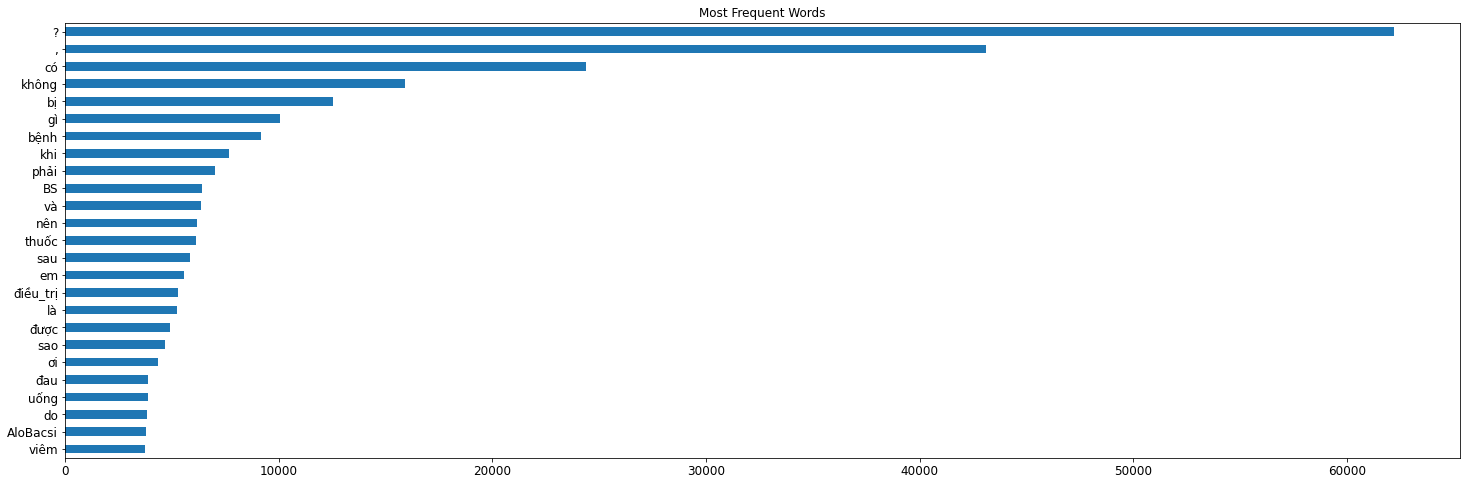

In [7]:
fig, ax = plt.subplots(figsize=(25,8))
pd.Series(' '.join(titles["titles"]).split()).value_counts()[:25].plot.barh(ax = ax, fontsize=12)
ax.set_title(f'Most Frequent Words')
fig.gca().invert_yaxis()

In [67]:

model = Top2Vec(documents=list(titles.values), workers=8, tokenizer=tokenizer,hdbscan_args={"core_dist_n_jobs":1})
model.save("/Users/namph/Documents/know-life/data/eda/top2vec_title")

2021-12-31 17:35:32,676 - top2vec - INFO - Pre-processing documents for training
2021-12-31 17:35:32,988 - top2vec - INFO - Creating joint document/word embedding
2021-12-31 17:36:59,199 - top2vec - INFO - Creating lower dimension embedding of documents
2021-12-31 17:37:48,629 - top2vec - INFO - Finding dense areas of documents
2021-12-31 17:37:51,586 - top2vec - INFO - Finding topics


In [71]:
model = Top2Vec.load("/Users/namph/Documents/know-life/data/eda/top2vec_title")
model.get_num_topics()

141

In [72]:
model.get_topic_sizes()

(array([3720, 3380, 2003, 1795, 1748, 1592, 1382, 1338, 1283, 1268, 1196,
        1172, 1080, 1078, 1011,  985,  860,  808,  775,  768,  765,  752,
         735,  721,  719,  701,  690,  674,  660,  643,  617,  609,  602,
         598,  584,  561,  557,  549,  542,  534,  525,  524,  511,  504,
         501,  480,  465,  461,  454,  439,  438,  413,  410,  401,  401,
         399,  397,  397,  388,  375,  356,  346,  346,  343,  341,  315,
         314,  305,  298,  294,  293,  293,  288,  284,  273,  270,  269,
         268,  260,  258,  258,  257,  253,  252,  249,  235,  228,  228,
         227,  220,  216,  214,  207,  205,  205,  195,  193,  193,  188,
         179,  176,  168,  163,  153,  141,  137,  136,  135,  133,  131,
         125,  125,  119,  117,  115,  107,  105,  101,   93,   93,   85,
          82,   78,   73,   71,   71,   70,   66,   66,   62,   59,   58,
          56,   49,   48,   47,   45,   41,   37,   36,   25]),
 array([  0,   1,   2,   3,   4,   5,   6,   7, 

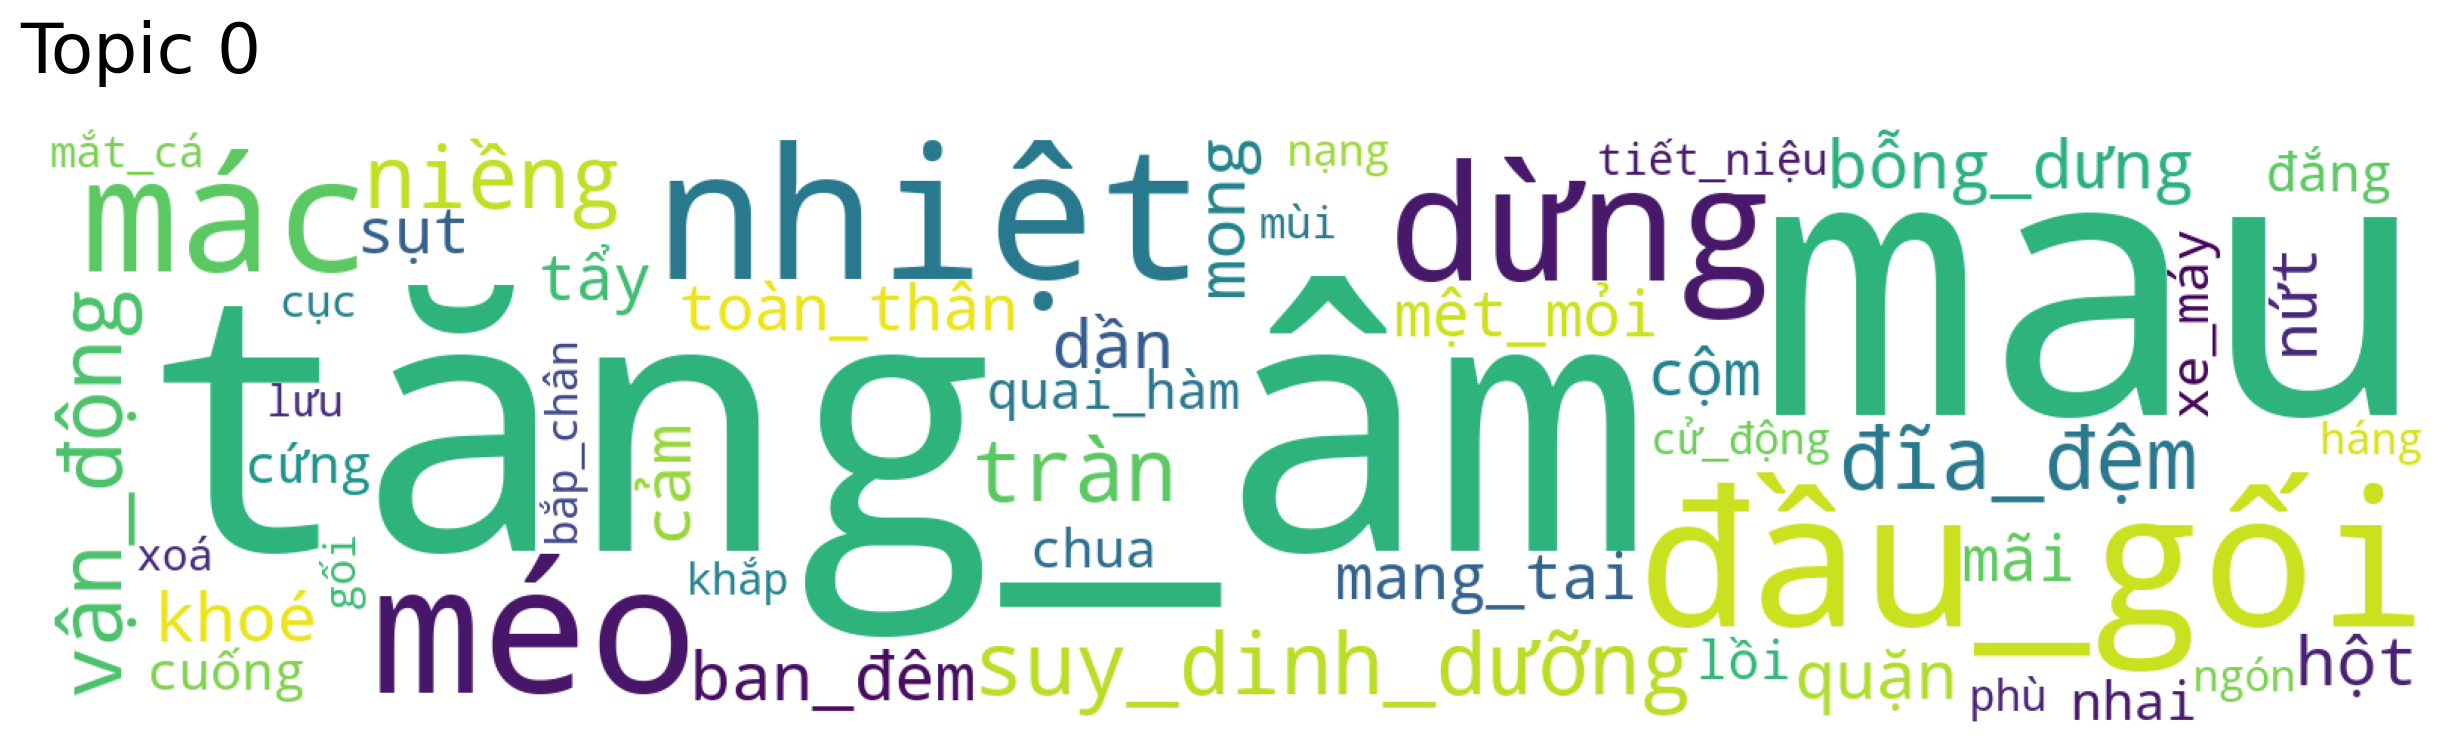

In [73]:
model.generate_topic_wordcloud(0, background_color='white')

In [75]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 41285, Score: 0.9518619775772095
-----------
suy thận
-----------

Document: 57042, Score: 0.9456473588943481
-----------
sữa sốt tư_vấn giúp
-----------

Document: 50710, Score: 0.9411315321922302
-----------
cháu sái quai_hàm ngáp đau ...
-----------

Document: 48130, Score: 0.9402478337287903
-----------
uống nghệ tươi phá_huỷ hồng_cầu
-----------

Document: 11341, Score: 0.9380742311477661
-----------
thở hít sâu lõm ngực tràn khí màng phổi
-----------

Document: 43736, Score: 0.934894323348999
-----------
bướu_giáp thuỳ trái uống thuốc_tây nam
-----------

Document: 26577, Score: 0.9331428408622742
-----------
polyp dây phẫu_thuật bệnh cải_thiện
-----------

Document: 16198, Score: 0.9322410225868225
-----------
ung_thư vảy sừng hoá thời_gian sống_còn bao_lâu
-----------

Document: 10911, Score: 0.9320271015167236
-----------
bí_quyết giúp bầu nhàn thời_gian thai
-----------

Document: 23503, Score: 0.9302241802215576
-----------
đỉnh đầu nhô hai cục mềm
-----------



##### BERTopic

In [158]:
from sentence_transformers import SentenceTransformer, util, models
model_name = '/Users/namph/Documents/know-life/models/ranking'
word_embedding_model = models.Transformer(model_name)
pooling_model = models.Pooling(word_embedding_model.get_word_embedding_dimension(), pooling_mode='cls')
model = SentenceTransformer(modules=[word_embedding_model, pooling_model])


Some weights of the model checkpoint at /Users/namph/Documents/know-life/models/ranking were not used when initializing RobertaModel: ['classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at /Users/namph/Documents/know-life/models/ranking and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it f

In [159]:
import pickle
with open('/Users/namph/Documents/know-life/data/eda/embeddings/title_embeddings.pkl', "rb") as fIn:
    stored_data = pickle.load(fIn)

In [160]:
from bertopic import BERTopic
topic_model = BERTopic(embedding_model=model)

In [161]:
tags = []
for t in stored_data["tags"]:
    if str(t) not in tags:
        tags.append(str(t))

In [162]:
stored_data["embeddings"][0].shape

(768,)

In [ ]:
import numpy as np
total = len(stored_data["titles"])
for t in tags:
    indexes = [idx for idx in range(total) if str(stored_data["tags"][idx]) == t]
    print("len:", len(indexes))
    docs = [stored_data["titles"][i] for i in indexes]
    embeddings = np.array([stored_data["embeddings"][i] for i in indexes])

    topics, probs = topic_model.fit_transform(docs, embeddings)
    print(topic_model.get_topic_info())
    df = pd.DataFrame({"topics": topics, "probs": probs, "titles": docs})
    df.to_csv(f"/Users/namph/Documents/know-life/data/eda/{t}.csv", index=False)

In [74]:
df = pd.DataFrame({"topics": topics, "probs": probs, "titles": stored_data["titles"]})
df.to_csv("/Users/namph/Documents/know-life/data/eda/title_topic.csv", index=False)

In [75]:
topic_model.save("/Users/namph/Documents/know-life/data/eda/topic_model")

In [76]:
topic_model.visualize_topics()

In [77]:
topic_model.visualize_hierarchy()

In [82]:
topic_model.get_representative_docs(60)

['Xét_nghiệm kết_quả " Anti_HAV_Total dương_tính " nghĩa thế_nào , BS ơi ?',
 'AloBacsi ơi , có phải cháu bị thuỷ_đậu trở_lại không ?',
 'BS ơi vì sao bé nhà em hay khóc đêm , đổ mồ_hôi ?']

##### Keyphrase extraction

In [89]:
import sys 
sys.path.append('/Users/namph/Documents/know-life')
from src.utils.normalizer import text_normalize
from src.utils.tokenizer import words_seg


In [87]:
def check_valid(text):
    count = 0
    for t in text.split():
        if not re.match("^[a-zA-Z0-9đĐ_]", t):
            count += 1
    return False if count >= len(text.split())//2 else True

In [95]:
import rake
import pandas as pd
df = pd.read_csv('/Users/namph/Documents/know-life/data/eda/question.csv')
titles = df["titles"].dropna().apply(text_normalize)
titles = titles.loc[titles.apply(lambda x: check_valid(x))]
titles = titles.drop_duplicates()

In [97]:

rake_object = rake.Rake("/Users/namph/Documents/know-life/data/eda/stopwords.txt", max_words_length=10)

text = titles.values.tolist()

keywords = rake_object.run(text)

In [98]:
len(keywords)

52715

In [100]:
keywords[:100]

[('ngưng uống thuốc clophehadi, orkenko, partamoltab, menison-4',
  2.9648070676520875),
 ('rối loạn lipit máu, uống sữa chống loãng xương', 2.962203562928771),
 ('tiểu gắt, tiểu lắt nhắt, tiểu buốt, triệu chứng bệnh', 2.9411689598893993),
 ('tiếng bụp, nghẹt mũi luân phiên, triệu chứng bệnh', 2.9084643115453854),
 ('rát họng, nổi hạch góc hàm, dấu hiệu bệnh nghiêm', 2.9076924974109297),
 ('viêm họng mạn, viêm amindan hốc mủ, viêm xoang', 2.9013907481856935),
 ('thuốc tây ph8, e400, e500, viên trứng', 2.8971059639172276),
 ('môn nóng rát, nổi mụn nhọt, dấu hiệu nhiễm hiv?', 2.8957115061403127),
 ('phẫu thuật u bì buồng trứng trái kích thước 40x32mm?', 2.8939887721373205),
 ('nổi mụn cuống lưỡi, nóng rát, đau họng, uống thuốc', 2.882532632877473),
 ('ngứa mắt, nổi vảy, dấu hiệu viêm tiết bã nhờn', 2.8749910826283505),
 ('uống hoạt huyết dưỡng não traphaco 6 viên/', 2.8715484204099835),
 ('cuống họng nổi hạt, dấu hiệu sùi mào gà?', 2.870057761679344),
 (', nổi mụn... dấu hiệu rối loạn nộ

In [19]:
import requests
from dateutil.parser import parse
api_url = "https://graph.facebook.com/v10.0/103250421878333/conversations?pretty=0&limit=25&before=QVFIUnR4czFrQklrck1XaWVxRGVjRXBVem4yQVhoekdJM3hzSFVqdFRKSmpCQWJjOC03UXhZAQ2FyTTdhVFlDVTZAMd0U1TTZAKSjNTdGExNks1amhnYVp0b1dSSXpmblVyR19idWJoRDQ3OGQyVnZAzTkRJZAHpUcmhfTmJGMWFCNm9MSkxm&access_token=EAAGbEV0gZA2sBANeLVFu34umWrHdPZBSzZCGpoxU8BPZBTlQe2qjqbN0JKAV92IVwEfD843KRjrgIORyMarZATefS8qjINtqwRlP3KZB9Q9hObZAvRO1LBelGVTqoCfmbKzPQZBYFr88cB7eQgRQqSggGUeWijDx8fZCZBHUxd3uffGFvW55qJQZBejDItrxbmW6ryYi5TUoYzH1AZDZD"
_next = True
data = []
while _next:
    response = requests.get(api_url)
    conversations = response.json()
    if conversations["paging"].get("next") and parse(conversations["data"][-1]["updated_time"]) > parse("2021-12-01T09:17:05+0000"):
        data.extend(conversations["data"])
        api_url = conversations["paging"].get("next")
        print(len(data))
    else:
        break

25
50
75
100
125
150
175
200


In [23]:
import json
with open("conversation_metadata.json", "w") as file:
    json.dump(data, file, ensure_ascii=False)

In [ ]:
import xlsxwriter
from tqdm import tqdm

with xlsxwriter.Workbook('chatlog.xlsx') as workbook:
    worksheet = workbook.add_worksheet()

    data_format1 = workbook.add_format({'bg_color': '#fff2cc'})
    data_format2 = workbook.add_format({'bg_color': '#f3f3f3'})
    header = workbook.add_format({'bg_color': '#f7cb85'})
    worksheet.set_row(0, cell_format=header)
    worksheet.write(0, 0, "Index")
    worksheet.write(0, 1, "timestamp")
    worksheet.write(0, 2, "conv_id")
    worksheet.write(0, 3, "input_text")
    worksheet.write(0, 4, "bot_text")

    row = 0
    data_format = data_format1
    for d in tqdm(data):
        url = f"https://graph.facebook.com/v10.0/{d['id']}/messages?fields=from%2Cmessage%2Ccreated_time&limit=30&access_token=EAAGbEV0gZA2sBANeLVFu34umWrHdPZBSzZCGpoxU8BPZBTlQe2qjqbN0JKAV92IVwEfD843KRjrgIORyMarZATefS8qjINtqwRlP3KZB9Q9hObZAvRO1LBelGVTqoCfmbKzPQZBYFr88cB7eQgRQqSggGUeWijDx8fZCZBHUxd3uffGFvW55qJQZBejDItrxbmW6ryYi5TUoYzH1AZDZD"
        response = requests.get(url)
        conv = list(reversed(response.json()["data"]))
        if data_format == data_format1:
            data_format = data_format2
        else:
            data_format = data_format1
        for c in conv:
            row += 1
            worksheet.set_row(row, cell_format=data_format)
            worksheet.write(row, 0, row)
            worksheet.write(row, 1, c["created_time"])
            worksheet.write(row, 2, d['id'] + "\n" + c["from"]["name"])
            if c["from"]["id"] == "103250421878333":
                worksheet.write(row, 4, c["message"])
            else:
                worksheet.write(row, 3, c["message"])

In [56]:
with open("/Users/namph/Documents/know-life/data_pipeline/EDA/conversation_metadata.json", "r") as file:
    data = json.load(file)
len(data)

200

In [57]:
from tqdm import tqdm

for d in tqdm(data):
    url = f"https://graph.facebook.com/v10.0/{d['id']}/messages?fields=from%2Cmessage%2Ccreated_time&access_token=EAAGbEV0gZA2sBALwJQPZBZCnYVyGKHZBYdzGnX3npQqbt5GZB2ccCdhTG3fnRZB95mC7a3ls6P9vvcP1IE0hFohjibLYeZC2CZAGgPA0C29xpQvOkelU4KWxlLrBmHkyQAfq3WJwyBECuRxwmLH5rpRFDULLZBZCw6WHLz4d4WxLAHUAs6uv4i58LFkV3M6qMwe2aCU9bZAoSiaKOusTELNBJE3"
    d["events"] = []
    d["link"] = "https://facebook.com" + d["link"]
    while True:
        response = requests.get(url)
        conv = response.json()["data"]
        paging = response.json()["paging"]

        d["events"].extend(conv)

        if not paging.get("next"):
            break
        else:
            url = paging.get("next")
    

  2%|▎         | 5/200 [00:12<10:22,  3.19s/it]

Tran Thu Tra


 29%|██▉       | 58/200 [01:49<04:47,  2.03s/it]

Chung Nguyen


 31%|███       | 62/200 [01:55<04:18,  1.87s/it]

Phạm Nam


100%|██████████| 200/200 [07:05<00:00,  2.13s/it]


In [68]:
chatlog = []
for d in data:
   ok = True
   for e in d["events"]:
      if e["from"]["name"] in ["Tran Thu Tra", "Phạm Nam", "Chung Nguyen", "Nguyen Duc Anh"]:
         ok = False
         break
   if ok:
      chatlog.append(d)
len(chatlog)

197

In [69]:
with open("chatlog.json", "w") as file:
    json.dump(chatlog, file, ensure_ascii=False, indent=4)